<a href="https://colab.research.google.com/github/Helzheng123/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading in packages

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading in Maternal Health Risk Dataset

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


# **Simple Linear Regression**

### Variables:
Independent Variable = Age

Dependent Variable = BS (Blood Sugar (mmol/L))

In [3]:
# extracting data for regression
X = sm.add_constant(df['Age'])  # Adds a constant term to the predictor # Age is the independent variable so we place it with X

# fit the regression model
model = sm.OLS(df['BS'], X) # BS is our dependent variable so we place it where y would be
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BS   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     292.1
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           9.85e-58
Time:                        01:12:04   Log-Likelihood:                -2518.4
No. Observations:                1014   AIC:                             5041.
Df Residuals:                    1012   BIC:                             5051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2703      0.222     23.763      0.0

### **Insights:** The R square value for the regression model is 0.224 (adjusted is 0.223). Since the R square value is closer to 0, this indicates that the independent variable (Age) was ***not a strong factor/predictor*** for blood sugar levels. This value also shows that only 22.4% of the variance in Blood Sugar can be explained by the variation in Age. Thus the relationship between age and blood sugar levels is ***very weak*** and shows that this model is not a strong predictor of blood sugar.

In [4]:
# linear regression analysis using statsmodels
# residuals are the differences between the observed values and the predicted values by the regression model (the errors in your model and how well your model fits the data)
# fitted values are the predicted values/ best fit

residuals = results.resid
fitted = results.fittedvalues

## Checking Assumptions

In [5]:
# assess linearity of the relationship by performing the Rainbow test
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.0802893708969694, p-value=0.19269939779773237


### **Insights:** since the p-value is 0.19, this is greater than the significance level, which suggests that there is ***no strong evidence against linear assumption***. This linear regression model can be a reasonable fit for the data.

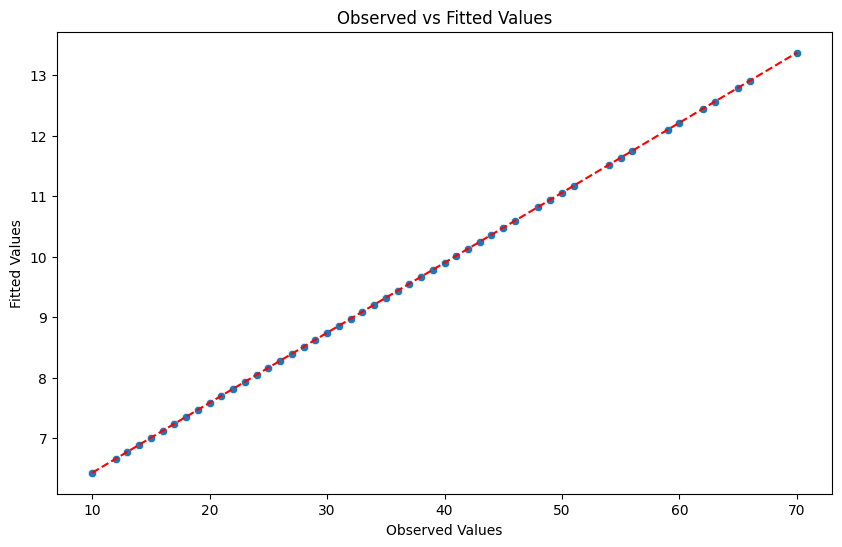

In [6]:
# plot observed vs fitted values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Age']), max(df['Age'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [7]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.8850183486938477, p-value=9.105725902840898e-27


### **Insights:** The Shapiro Wilk Test came out to be a p-value of 9.11e-27, which is lower than 0.05. This shows that the residuals ***do not have a normal distribution***. The data deviates significantly from a normal distribution.

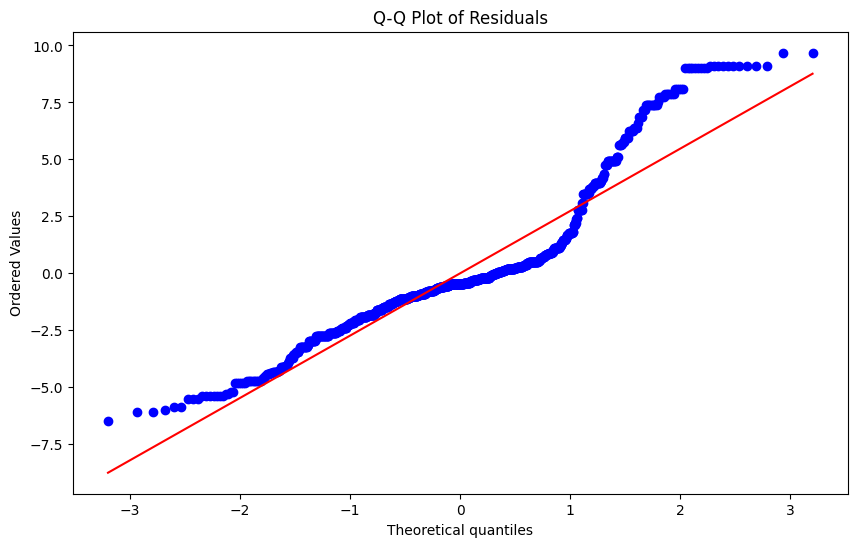

In [8]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### **Insights**: A Quantile-Quantile Plot helps assess how well the residuals follows the normal/theoretical distribution. In this QQ plot, the points deviate from the straight line, illustrating that the residuals do not follow the theorectical distribution.

In [9]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.8091355026247073, p-value=0.9912560933343519


### **Insights:** the p-value is 0.99 which is above the significance level of 0.05, which means there is not enough evidence to show that there is a significant effect/difference on the homogeneity of variance. There is no strong indication that the variance of the residuals differs significantly across the variables.

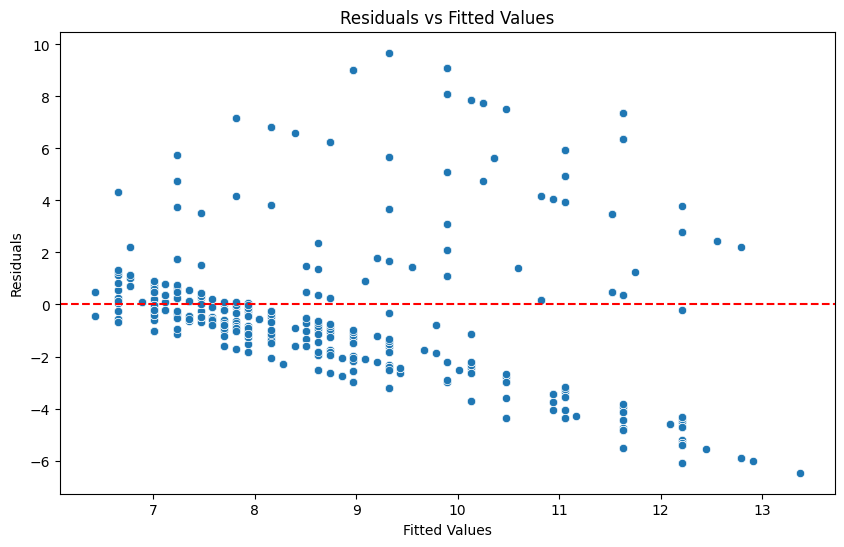

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# **Multiple Linear Regression**

### Variables:

IV: Age, Diastolic Blood Pressure, Blood Sugar, Body Temperature, Heart Rate

DV: Systolic Blood Pressure

In [23]:
X = df[['BodyTemp', 'Age', 'BS', 'DiastolicBP', 'HeartRate']]
X = sm.add_constant(X)
y = df['SystolicBP']

model_1 = sm.OLS(y, X)

results_1 = model_1.fit()

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.21e-221
Time:                        01:43:30   Log-Likelihood:                -3871.5
No. Observations:                1014   AIC:                             7755.
Df Residuals:                    1008   BIC:                             7785.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         137.8030     26.898      5.123      

### **Insights:** The R-square value for this multiple regression model is 0.642 (adjusted = 0.640). This is moderately strong relationship between the independent variables and the dependent variable. There is a good portion of variation in the dependent variable (systolic blood pressure) that can be understood and predicted based on the independent variables (64.2% variability observed in the dependent variable).

In [24]:
residuals_1 = results_1.resid
fitted_1 = results_1.fittedvalues

In [25]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
      Variable          VIF
0        const  6012.699203
1     BodyTemp     1.121632
2          Age     1.428679
3           BS     1.446578
4  DiastolicBP     1.362384
5    HeartRate     1.048250


### **Insights:** Variance Inflation Factor is used for detecting multicollinearity, where two or more independent variables are highly correlated with each other. If the VIF>10, then multicollinearity is consider high, leading to unstable/unreliable coefficient estimates. In this case, all the variables are less than 10 and are closer to 1, indicating that there is very little multicollinearity associated between the independent variables.

In [26]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results_1)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9388091204737412, p-value=0.760706762558816


### **Insights:** since the p-value is 0.76, this is greater than the significance level, which suggests that there is ***no strong evidence against linear assumption***. This linear regression model can be a reasonable fit for the data.

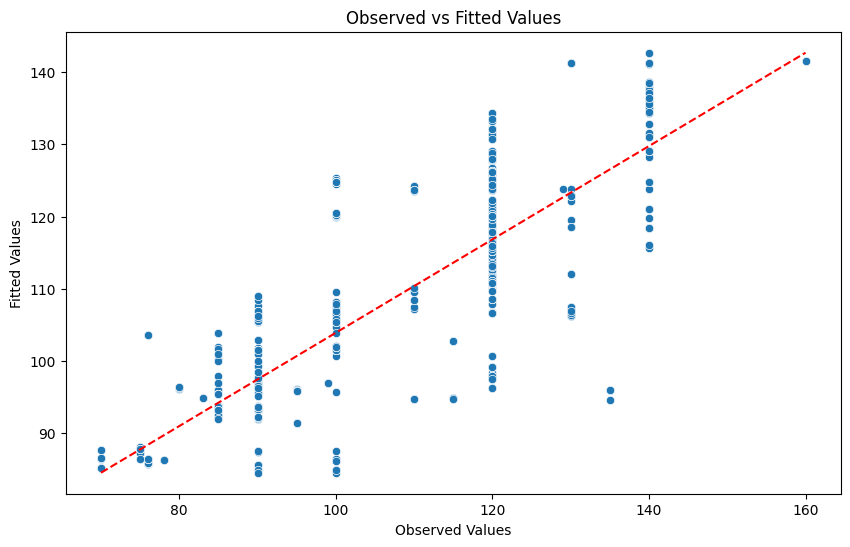

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['SystolicBP'], y=fitted_1)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['SystolicBP']), max(df['SystolicBP'])], [min(fitted_1), max(fitted_1)], color='red', linestyle='--')
plt.show()

In [28]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals_1)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9726724624633789, p-value=6.921137924928433e-13


### **Insights:** The Shapiro Wilk Test came out to be a p-value of 9.11e-27, which is lower than 0.05. This shows that the residuals ***do not have a normal distribution***. The data deviates significantly from a normal distribution.

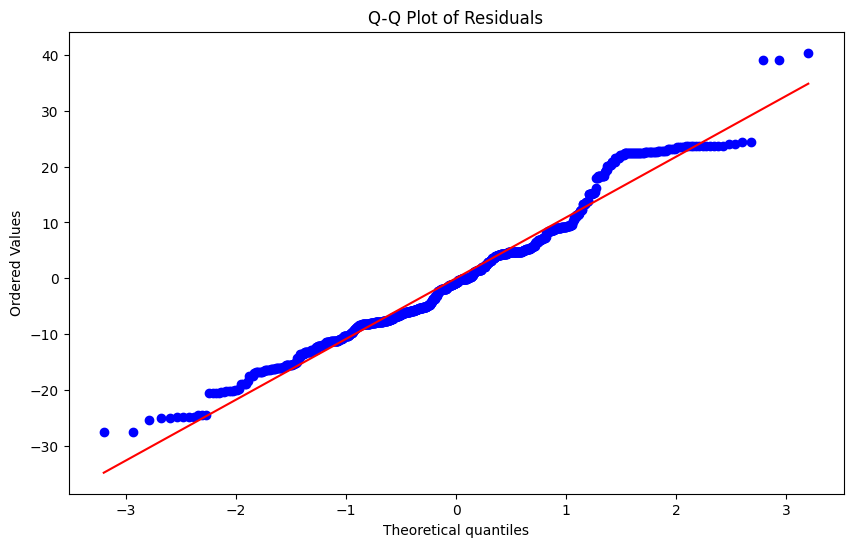

In [29]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_1, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### **Insights**: A Quantile-Quantile Plot helps assess how well the residuals follows the normal/theoretical distribution. In this QQ plot, the points deviate from the straight line, illustrating that the residuals do not follow the theorectical distribution.

In [30]:
gq_test = het_goldfeldquandt(residuals_1, results_1.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.0703715841443338, p-value=0.2234373498670896


### **Insights:** the p-value is 0.01 which is below the significance level of 0.05, which means ***there is enough evidence*** to show that there is a significant effect/difference on the homogeneity of variance. There is a strong indication that the variance of the residuals differs significantly across the variables.

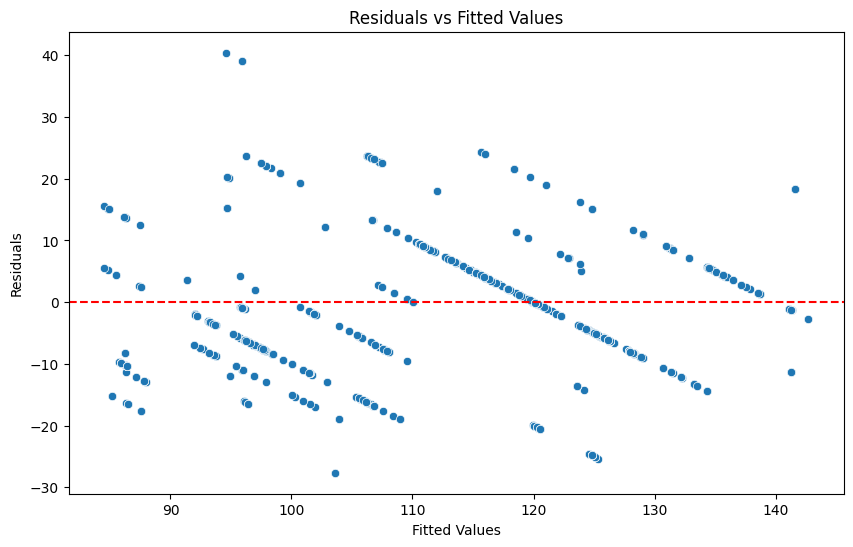

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_1, y=residuals_1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()